<a href="https://colab.research.google.com/github/GraLesl/MAT-421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Differentiation

- Problem Statement
- Finite Difference
- Approximating Higher Order

#### Problem Definition
Often times, in a variety of fields, the derivative of  a function is highly desired. As such, numerical derivation over a range of values for functions should be developed.

Whilst python can represent continuous functions, it is often discretized down to a set of points which describe the function instead.

#### Finite Difference

One approach to numerical differentiation is applyiing the definition of a derivative directly.

$f'(a) = lim_{(x→a)} \frac{f(x) - f(a)}{x-a}$

For a given point, this can be done looking at the current point and the next one, the current point and the previous one, or the previous one and the next one. These  are called the forward, backward, and central difference respectivley.


Another approach is to go through the taylor series to approximate the derivative. Here:

$f(x) = \frac{f(x_j)(x-x_j)^0}{1!} + \frac{f'(x_j)(x-x_j)^1}{2!} + ...$

Setting the series at $ x = x_{j+1}$, substituting $h = x_{j+1} - x_j$, and solving for $f'(x_j)$ we arrive at

$f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{h} + (-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} ...)$

Here, everything tin the parenthases to the left gets trunkated to $O(h^p)$ which represents some representation of $h^p(α + ϵ(h))$. This $O(h)$ expression represents the accuracy of the formula. A higher order $p$ results in a generally more accurate formula.

This resultas in a final formula of

$f'(x_j) =̃ \frac{f(x_{j+1}) - f(x_j)}{h} + O(h)$

Understandably, this equation can be easily deduced again for the backwards difference formula by solving around $ a = x_j$ at $x = x_{j-1}$

Interestingly when the equation is solved around $ a = x_j$ at both $x = x_{j-1}$ and $x = x_{j+1}$, the final central difference formula becomes.


$f'(x_j) =̃ \frac{f(x_{j+1}) - f(x_{j-1})}{h} + O(h^2)$

Here, because the $O(h)$ term has a higher order, it is gernerally more precise, even though it requires the same number of calculations.

Below, the forward difference method will be employed to approximate the derivative of a cosine funciton.

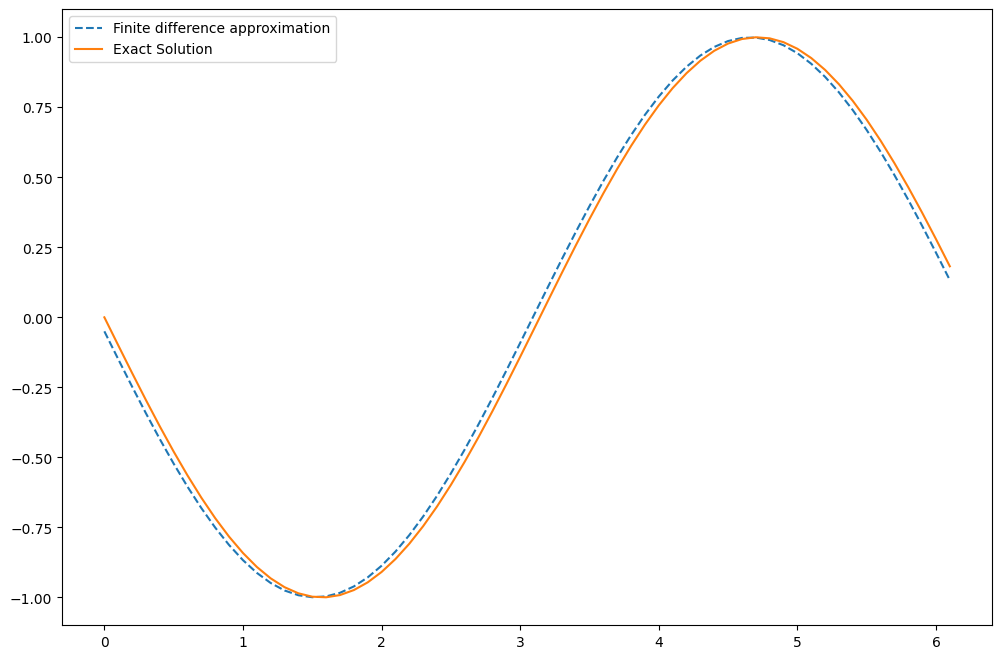

In [2]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.1

x = np.arange(0, 2*np.pi, h)
y = np.cos(x)

forDiff = np.diff(y)/h
x_diff = x[:-1:]
exact = -np.sin(x_diff)

plt.figure(figsize = (12,8))
plt.plot(x_diff, forDiff, '--', label = 'Finite difference approximation')
plt.plot(x_diff, exact, label = 'Exact Solution')
plt.legend()
plt.show()

If this process is repeated for a range of step sizes, we can observe how the accuracy changes with relation to step size. As seen below, As the step size decreases, so to does the error with a slope of 1 in the log-log space. This shows that the error is proportional to $h^1$ as expected.

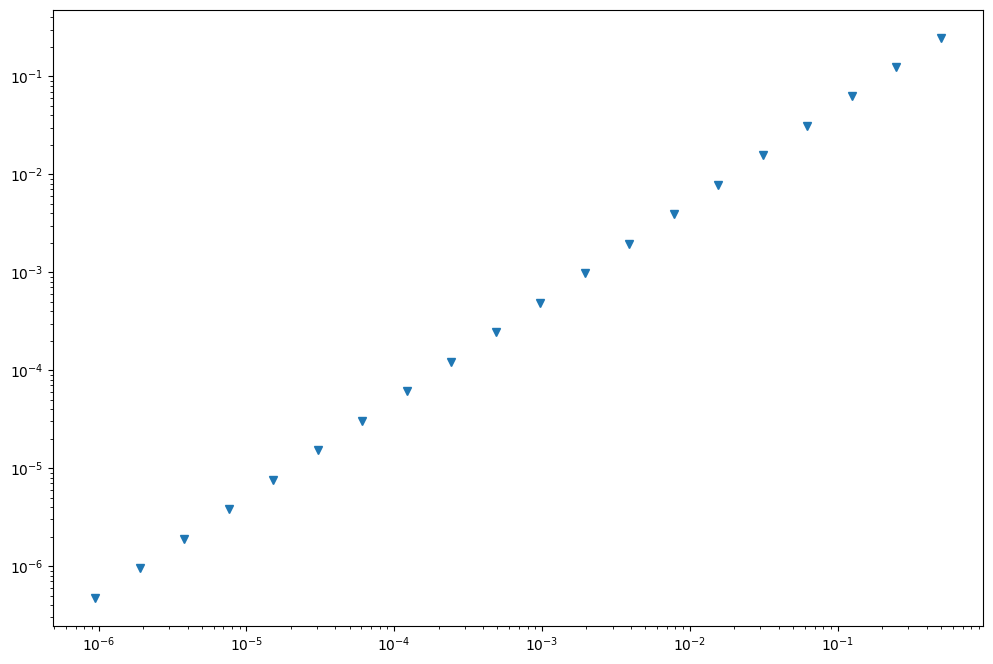

In [3]:
h = 1
iterations = 20
step_size = []
max_error = []

for i in range(iterations):
  h /= 2
  step_size.append(h)

  x = np.arange(0, 2*np.pi, h)
  y = np.cos(x)

  forDiff = np.diff(y)/h
  x_diff = x[:-1:]
  exact = -np.sin(x_diff)

  max_error.append(max(abs(exact - forDiff)))

plt.figure(figsize = (12,8))
plt.loglog(step_size, max_error, 'v')
plt.show()

#### Higher Order Derivatives

For higher order derivatives, the taylor series can once again be used to derive a formula. The one for the second derivative is shown below.

$f''(x_j) = \frac{f(x_{j+1}) -2f(x_j)+f(x_{j-1})}{h^2}$ and is $O(h^2)$

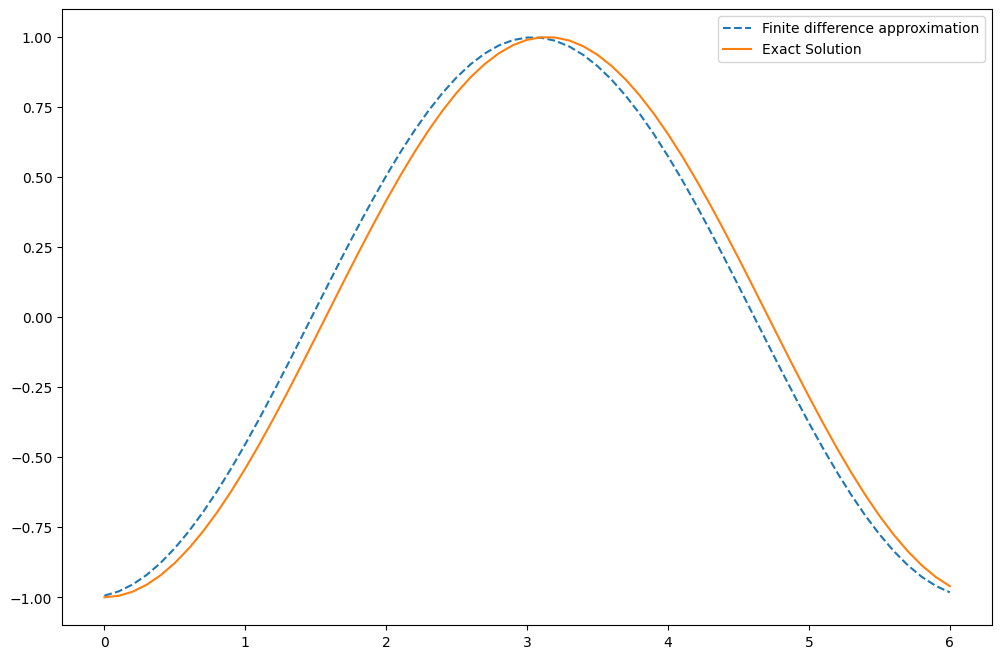

In [9]:
h = 0.1

x = np.arange(0, 2*np.pi, h)
y = np.cos(x)
secondDer = []

for i in range(len(x)-2):

  secondDer.append((y[i+2] - 2*y[i+1] + y[i])/(h**2))

x_diff = x[:-2:]
exact = -np.cos(x_diff)

plt.figure(figsize = (12,8))
plt.plot(x_diff, secondDer, '--', label = 'Finite difference approximation')
plt.plot(x_diff, exact, label = 'Exact Solution')
plt.legend()
plt.show()